Saving tiktok_data.csv to tiktok_data (7).csv

1. Urutkan Data berdasarkan Views (Merge Sort)
2. Urutkan Data berdasarkan Views (Quick Sort)
3. Bandingkan Waktu Eksekusi
4. Visualisasi Perbandingan Waktu Eksekusi
5. Keluar
Masukkan pilihan Anda: 1
10 Data Teratas berdasarkan Views (Merge Sort):
(299, 'Berita', 479, 5306, 5909, 11694)
(295, 'Berita', 1293, 5537, 478, 7308)
(271, 'Berita', 4624, 3178, 9810, 17612)
(265, 'Berita', 7428, 1759, 131, 9318)
(238, 'Berita', 7878, 4145, 3478, 15501)
(232, 'Berita', 1659, 4950, 1292, 7901)
(225, 'Berita', 4566, 8129, 1118, 13813)
(208, 'Berita', 7735, 4266, 5621, 17622)
(194, 'Berita', 641, 8977, 7352, 16970)
(185, 'Berita', 5196, 629, 8805, 14630)

1. Urutkan Data berdasarkan Views (Merge Sort)
2. Urutkan Data berdasarkan Views (Quick Sort)
3. Bandingkan Waktu Eksekusi
4. Visualisasi Perbandingan Waktu Eksekusi
5. Keluar
Masukkan pilihan Anda: 2
10 Data Teratas berdasarkan Views (Quick Sort):
(11, 'Berita', 4269, 1775, 6306, 12350)
(299, 'Berit

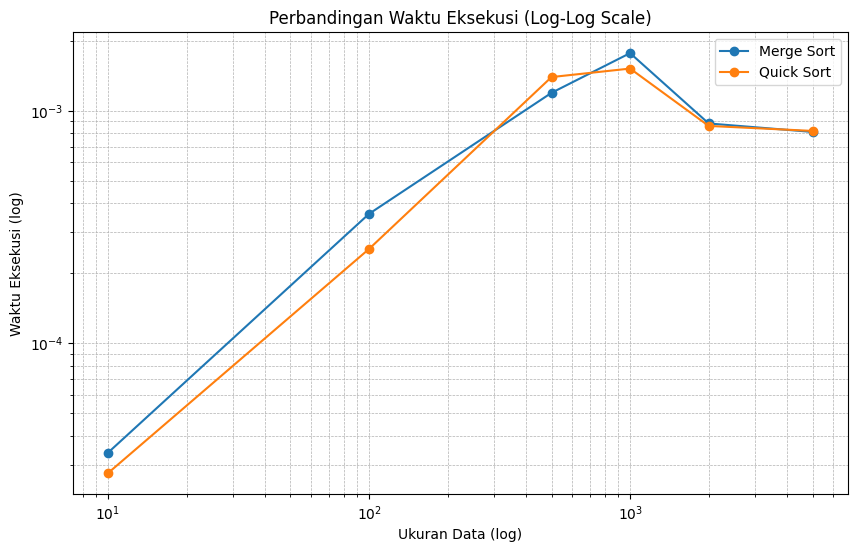


1. Urutkan Data berdasarkan Views (Merge Sort)
2. Urutkan Data berdasarkan Views (Quick Sort)
3. Bandingkan Waktu Eksekusi
4. Visualisasi Perbandingan Waktu Eksekusi
5. Keluar
Masukkan pilihan Anda: 5
Keluar dari program.


In [16]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from google.colab import files

def muat_data_dari_file():
    """Unggah file CSV dari Google Colab dan muat ke dalam DataFrame."""
    uploaded = files.upload()  # Unggah file
    nama_file = list(uploaded.keys())[0]  # Ambil nama file yang diunggah
    df = pd.read_csv(nama_file)
    data = list(df.itertuples(index=False, name=None))
    return data

# Implementasi Merge Sort (rekursif)
def merge_sort(data):
    """Mengurutkan data menggunakan Merge Sort berdasarkan jumlah views."""
    if len(data) > 1:
        tengah = len(data) // 2
        bagian_kiri = data[:tengah]
        bagian_kanan = data[tengah:]

        merge_sort(bagian_kiri)
        merge_sort(bagian_kanan)

        i = j = k = 0
        while i < len(bagian_kiri) and j < len(bagian_kanan):
            if bagian_kiri[i][1] < bagian_kanan[j][1]:
                data[k] = bagian_kiri[i]
                i += 1
            else:
                data[k] = bagian_kanan[j]
                j += 1
            k += 1

        while i < len(bagian_kiri):
            data[k] = bagian_kiri[i]
            i += 1
            k += 1

        while j < len(bagian_kanan):
            data[k] = bagian_kanan[j]
            j += 1
            k += 1

# Implementasi Quick Sort (iteratif)
def quick_sort(data):
    """Mengurutkan data menggunakan Quick Sort secara iteratif berdasarkan jumlah views."""
    stack = [(0, len(data) - 1)]

    while stack:
        awal, akhir = stack.pop()
        if awal < akhir:
            pivot = data[akhir][1]
            i = awal - 1

            for j in range(awal, akhir):
                if data[j][1] < pivot:
                    i += 1
                    data[i], data[j] = data[j], data[i]

            data[i + 1], data[akhir] = data[akhir], data[i + 1]
            pi = i + 1

            stack.append((awal, pi - 1))
            stack.append((pi + 1, akhir))

def hitung_waktu_eksekusi(algoritma, data):
    """Fungsi untuk menghitung waktu eksekusi algoritma."""
    data_copy = data.copy()
    start_time = time.time()
    algoritma(data_copy)
    end_time = time.time()
    return end_time - start_time

def visualisasi_perbandingan(data):
    """Visualisasi perbandingan waktu eksekusi dengan berbagai ukuran data."""
    ukuran_data = [10, 100, 500, 1000, 2000, 5000]  # Ukuran sampel data
    waktu_merge = []
    waktu_quick = []

    for ukuran in ukuran_data:
        sampel_data = data[:ukuran]

        waktu_merge.append(hitung_waktu_eksekusi(merge_sort, sampel_data))
        waktu_quick.append(hitung_waktu_eksekusi(quick_sort, sampel_data))

    # Plot grafik log-log
    plt.figure(figsize=(10, 6))
    plt.plot(ukuran_data, waktu_merge, label="Merge Sort", marker="o")
    plt.plot(ukuran_data, waktu_quick, label="Quick Sort", marker="o")

    plt.xscale("log")
    plt.yscale("log")
    plt.title("Perbandingan Waktu Eksekusi")
    plt.xlabel("Ukuran Data (log)")
    plt.ylabel("Waktu Eksekusi (log)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

if __name__ == "__main__":
    data_tiktok = muat_data_dari_file()

    while True:
        print("\n1. Urutkan Data berdasarkan Views (Merge Sort)")
        print("2. Urutkan Data berdasarkan Views (Quick Sort)")
        print("3. Bandingkan Waktu Eksekusi")
        print("4. Visualisasi Perbandingan Waktu Eksekusi")
        print("5. Keluar")

        pilihan = input("Masukkan pilihan Anda: ")

        if pilihan == "1":
            merge_sort(data_tiktok)
            print("10 Data Teratas berdasarkan Views (Merge Sort):")
            for item in data_tiktok[:10]:
                print(item)

        elif pilihan == "2":
            quick_sort(data_tiktok)
            print("10 Data Teratas berdasarkan Views (Quick Sort):")
            for item in data_tiktok[:10]:
                print(item)

        elif pilihan == "3":
            waktu_merge_sort = hitung_waktu_eksekusi(merge_sort, data_tiktok)
            waktu_quick_sort = hitung_waktu_eksekusi(quick_sort, data_tiktok)

            print(f"\nWaktu Eksekusi:")
            print(f"- Merge Sort: {waktu_merge_sort:.5f} detik")
            print(f"- Quick Sort: {waktu_quick_sort:.5f} detik")

        elif pilihan == "4":
            visualisasi_perbandingan(data_tiktok)

        elif pilihan == "5":
            print("Keluar dari program.")
            break

        else:
            print("Pilihan tidak valid. Silakan coba lagi.")
